**Laporan Proyek Machine Learning - Faishal Anwar Haysim**

# **1. Importing Libraries**

Untuk melakukan analisis data yang efektif di Google Colab, beberapa pustaka penting perlu diimpor terlebih dahulu. Berikut adalah penjelasan tentang setiap pustaka dan fungsinya:



*   **NumPy (import numpy as np)**: Pustaka fundamental untuk komputasi ilmiah dengan Python. NumPy menyediakan dukungan untuk array multidimensi dan berbagai fungsi matematis.
*   **Matplotlib (import matplotlib**.pyplot as plt): Pustaka untuk membuat visualisasi data. Matplotlib digunakan untuk membuat berbagai jenis grafik, seperti plot garis, histogram, dan scatter plot.
*   **Pandas (import pandas as pd)**: Pustaka untuk manipulasi dan analisis data. Pandas menyediakan struktur data seperti DataFrame dan Series, yang sangat berguna untuk mengelola data tabular.
*   **%matplotlib inline**: Magic command yang digunakan untuk menampilkan grafik langsung di dalam notebook.
*   **Seaborn (import seaborn as sns)**: Pustaka yang dibangun di atas Matplotlib untuk membuat visualisasi statistik yang lebih menarik dan informatif.
*   **sklearn.preprocessing.MinMaxScaler:** Mengubah rentang data menjadi 0 dan 1.
*   **keras.models.Sequential:** Menumpuk lapisan model secara berurutan.
*   **keras.layers.Dense:** Lapisan fully connected dalam model deep learning.
*   **keras.layers.LSTM:** Jenis RNN yang dirancang untuk data urutan.
*   keras.layers.Dropout: Mencegah overfitting dengan menonaktifkan neuron secara acak.
*   **keras.layers.GRU:** Mirip dengan LSTM tetapi lebih sederhana.
*   **keras.layers.Bidirectional:** Memproses input urutan dalam dua arah.
*   **tensorflow.keras.optimizers.SGD:** Algoritma optimisasi yang memperbarui bobot model.
*   **math:** Fungsi matematika dasar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math

# **2. Data Loading**

**from google.colab import files:** Mengimpor modul files dari pustaka Google Colab, yang menyediakan fungsi untuk berinteraksi dengan file di lingkungan Colab.

**files.upload():** Memanggil fungsi upload() yang memungkinkan pengguna untuk mengunggah file dari komputer lokal ke lingkungan Google Colab. Setelah fungsi ini dieksekusi, pengguna akan diberikan opsi untuk memilih file yang ingin diunggah.

bagi yang ingin mendownload data/file, bisa mengunjungi link kaggle atau google drive dibawah

link kaggle : https://www.kaggle.com/datasets/gallo33henrique/bitcoin-btc-usd-stock-dataset

link GDrive : https://drive.google.com/file/d/1NY_yzfCS7-bNuTbyjA4m5vqcUM5eFsLj/view?usp=drive_link

In [2]:
from google.colab import files
files.upload()

Saving BTC-USD_stock_data.csv to BTC-USD_stock_data.csv


{'BTC-USD_stock_data.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n2017-01-01,963.6580200195312,1003.0800170898438,958.698974609375,998.3250122070312,998.3250122070312,147775008\r\n2017-01-02,998.6170043945312,1031.3900146484375,996.7020263671875,1021.75,1021.75,222184992\r\n2017-01-03,1021.5999755859375,1044.0799560546875,1021.5999755859375,1043.8399658203125,1043.8399658203125,185168000\r\n2017-01-04,1044.4000244140625,1159.4200439453125,1044.4000244140625,1154.72998046875,1154.72998046875,344945984\r\n2017-01-05,1156.72998046875,1191.0999755859375,910.4169921875,1013.3800048828125,1013.3800048828125,510199008\r\n2017-01-06,1014.239990234375,1046.81005859375,883.9439697265625,902.2009887695312,902.2009887695312,351876000\r\n2017-01-07,903.4869995117188,908.5850219726562,823.5560302734375,908.5850219726562,908.5850219726562,279550016\r\n2017-01-08,908.1749877929688,942.7239990234375,887.2490234375,911.198974609375,911.198974609375,158715008\r\n2017-01-09,913.2440185546875,913.6

**btc = pd.read_csv('/content/BTC-USD_stock_data.csv'):** Menggunakan fungsi read_csv() dari pustaka Pandas untuk membaca file CSV yang terletak di jalur /content/BTC-USD_stock_data.csv.

Hasil pembacaan disimpan dalam variabel btc, yang akan menjadi sebuah DataFrame Pandas yang berisi data dari file tersebut.

**btc** : Menampilkan isi dari DataFrame btc yang berisi data yang telah dibaca dari file CSV.

In [3]:
btc = pd.read_csv('/content/BTC-USD_stock_data.csv')
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...,...
2831,2024-10-02,60836.324219,62357.687500,59996.949219,60632.785156,60632.785156,40762722398
2832,2024-10-03,60632.484375,61469.039062,59878.804688,60759.402344,60759.402344,36106447279
2833,2024-10-04,60754.625000,62465.992188,60459.941406,62067.476562,62067.476562,29585472513
2834,2024-10-05,62067.609375,62371.023438,61689.582031,62089.949219,62089.949219,13305410749


**btc.info():**
Fungsi info() dari pustaka Pandas digunakan untuk menampilkan informasi tentang DataFrame btc, seperti jumlah baris dan kolom, jenis data tiap kolom, dan jumlah nilai kosong.

In [4]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2836 non-null   object 
 1   Open       2836 non-null   float64
 2   High       2836 non-null   float64
 3   Low        2836 non-null   float64
 4   Close      2836 non-null   float64
 5   Adj Close  2836 non-null   float64
 6   Volume     2836 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.2+ KB


**btc.describe():**

*   Fungsi describe() dari pustaka Pandas digunakan untuk menghasilkan ringkasan statistik dari DataFrame btc.
*   Fungsi ini memberikan informasi seperti jumlah (count), nilai rata-rata (mean), deviasi standar (std), nilai minimum (min), kuartil (25%, 50%, 75%), dan nilai maksimum (max) untuk kolom-kolom numerik dalam DataFrame.





In [5]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2.836000e+03
mean,23241.696396,23767.721452,22681.085905,23262.039342,23262.039342,2.287903e+10
std,19766.306933,20199.763573,19290.278300,19773.829052,19773.829052,1.888917e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,7277.492554,7435.214966,7113.698975,7277.790405,7277.790405,7.730409e+09
50%,16601.785156,16804.058594,16284.663574,16603.525391,16603.525391,2.026586e+10
75%,37470.646484,38601.096680,36421.379883,37493.499023,37493.499023,3.252037e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


# **3. Exploratory Data Analysis**

bagian ini menampilkan grafik anlisis dari beberapa faktor, anata lain:
*   Total Volume Trader by Year
*   Total Volume Trader by Month for Each Year
*   High and Low Value Over time
*   High and Low Value for 2023
*   High and Low Value for October 2023


In [6]:
btc['Date'] = pd.to_datetime(btc['Date'])

**btc_analyzing = btc.copy():**

Fungsi copy() digunakan untuk membuat salinan dari DataFrame btc. Ini dilakukan untuk menghindari perubahan pada data asli.

**btc_analyzing['Year'] = btc_analyzing['Date'].dt.year:**

Fungsi dt.year digunakan untuk mengekstrak tahun dari kolom 'Date' dan menyimpannya dalam kolom baru 'Year'.

**btc_analyzing['Month'] = btc_analyzing['Date'].dt.month:**

Fungsi dt.month digunakan untuk mengekstrak bulan dari kolom 'Date' dan menyimpannya dalam kolom baru 'Month'.

**btc_analyzing['Difference'] = btc_analyzing['Close'] - btc_analyzing['Open']:**

Fungsi ini digunakan untuk menghitung selisih antara harga penutupan ('Close') dan harga pembukaan ('Open') untuk setiap baris, dan menyimpan hasilnya dalam kolom baru 'Difference'.

**annual_volume = btc_analyzing.groupby('Year')['Volume'].sum().reset_index():**

Fungsi groupby() digunakan untuk mengelompokkan data berdasarkan tahun, dan fungsi sum() digunakan untuk menjumlahkan total volume perdagangan untuk setiap tahun. Hasilnya disimpan dalam DataFrame baru 'annual_volume'.

**plt.figure(figsize=(12, 6)):**

Fungsi figure() digunakan untuk membuat plot baru, dan argumen figsize menentukan ukuran plot dalam satuan inci. Dalam hal ini, kita menggunakan ukuran 12x6 inci untuk membuat plot yang lebih besar dan lebih mudah dibaca.

**plt.bar(annual_volume['Year'].astype(str), annual_volume['Volume'], color='skyblue'):**

Fungsi bar() digunakan untuk membuat grafik batang, dengan tahun sebagai sumbu x dan total volume perdagangan sebagai sumbu y. Argumen color menentukan warna grafik, dalam hal ini kita menggunakan warna skyblue.

**plt.xlabel('Year'):**

Fungsi xlabel() digunakan untuk menambahkan label pada sumbu x, dalam hal ini kita menambahkan label 'Year'.

**plt.ylabel('Total Volume Traded'):**

Fungsi ylabel() digunakan untuk menambahkan label pada sumbu y, dalam hal ini kita menambahkan label 'Total Volume Traded'.

**plt.title('Total Volume Traded by Year'):**

Fungsi title() digunakan untuk menambahkan judul pada plot, dalam hal ini kita menambahkan judul 'Total Volume Traded by Year'.

**plt.xticks(rotation=45):**

Fungsi xticks() digunakan untuk mengatur rotasi label pada sumbu x, dalam hal ini kita mengatur rotasi 45 derajat untuk membuat label lebih mudah dibaca.

**plt.tight_layout():**

Fungsi tight_layout() digunakan untuk mengatur layout plot agar lebih rapi dan mudah dibaca.

**plt.show():**

Fungsi show() dari perpustakaan matplotlib digunakan untuk menampilkan plot.

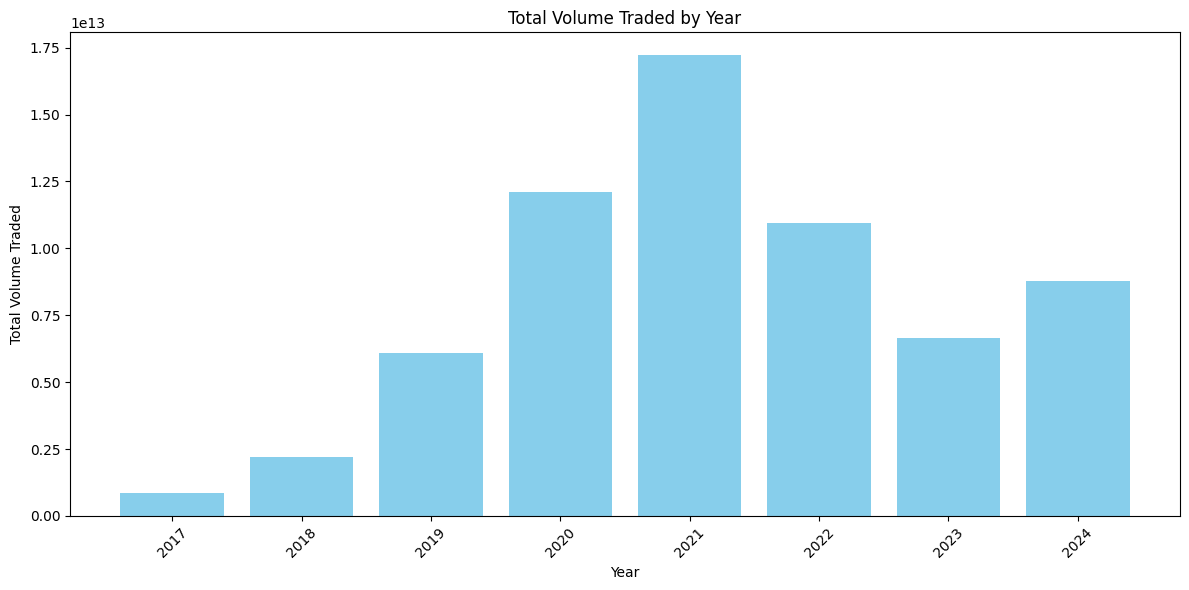

In [7]:
btc_analyzing = btc.copy()

# Tambahkan kolom 'Year', 'Month', dan 'Difference'
btc_analyzing['Year'] = btc_analyzing['Date'].dt.year
btc_analyzing['Month'] = btc_analyzing['Date'].dt.month
btc_analyzing['Difference'] = btc_analyzing['Close'] - btc_analyzing['Open']

annual_volume = btc_analyzing.groupby('Year')['Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(annual_volume['Year'].astype(str), annual_volume['Volume'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Volume Traded')
plt.title('Total Volume Traded by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**monthly_volume = btc_analyzing.groupby(['Year', 'Month'])['Volume'].sum().unstack():**

Fungsi groupby() digunakan untuk mengelompokkan data berdasarkan kolom 'Year' dan 'Month', kemudian fungsi sum() digunakan untuk menjumlahkan total volume perdagangan untuk setiap kombinasi tahun dan bulan. Hasilnya kemudian diubah menjadi format tabel dengan fungsi unstack(), sehingga bulan menjadi kolom dan tahun menjadi indeks. Ini menghasilkan DataFrame baru yang menyimpan total volume perdagangan per bulan untuk setiap tahun.

**plt.figure(figsize=(12, 6)):**

Fungsi figure() digunakan untuk membuat plot baru, dan argumen figsize menentukan ukuran plot dalam satuan inci. Dalam hal ini, ukuran plot yang digunakan adalah 12x6 inci untuk memberikan ruang yang cukup agar grafik lebih jelas dan mudah dibaca.

**monthly_volume.plot(kind='bar', width=0.8, ax=plt.gca(), colormap='tab20'):**

Fungsi plot() digunakan untuk membuat grafik batang dari DataFrame monthly_volume.

kind='bar' menunjukkan bahwa jenis grafik yang ingin dibuat adalah grafik batang.
width=0.8 mengatur lebar batang agar tidak terlalu lebar dan memberikan ruang antara batang.
ax=plt.gca() mengarahkan plot ke sumbu saat ini.
colormap='tab20' menentukan palet warna yang digunakan untuk batang, dalam hal ini menggunakan palet warna 'tab20' untuk memberikan warna yang berbeda untuk setiap tahun.

**plt.xlabel('Month'):**

Fungsi xlabel() digunakan untuk menambahkan label pada sumbu x, dalam hal ini label yang ditambahkan adalah 'Month'.

**plt.ylabel('Total Volume Traded'):**

Fungsi ylabel() digunakan untuk menambahkan label pada sumbu y, dalam hal ini label yang ditambahkan adalah 'Total Volume Traded'.

**plt.title('Total Volume Traded by Month for Each Year'):**

Fungsi title() digunakan untuk menambahkan judul pada plot, dalam hal ini judul yang ditambahkan adalah 'Total Volume Traded by Month for Each Year'.

**plt.xticks(rotation=0):**

Fungsi xticks() digunakan untuk mengatur rotasi label pada sumbu x, dalam hal ini rotasi diatur ke 0 derajat agar label bulan ditampilkan secara horizontal dan lebih mudah dibaca.

**plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left'):**

Fungsi legend() digunakan untuk menampilkan legenda pada plot.

title='Year' memberikan judul pada legenda.
bbox_to_anchor=(1.05, 1) mengatur posisi legenda di luar area plot, di sebelah kanan atas.
loc='upper left' menunjukkan bahwa posisi referensi untuk legenda adalah sudut kiri atas dari area yang ditentukan oleh bbox_to_anchor.

**plt.tight_layout():**

Fungsi tight_layout() digunakan untuk mengatur layout plot agar lebih rapi dan tidak ada elemen yang saling tumpang tindih, sehingga meningkatkan keterbacaan.

**plt.show():**

Fungsi show() dari perpustakaan matplotlib digunakan untuk menampilkan plot yang telah dibuat.

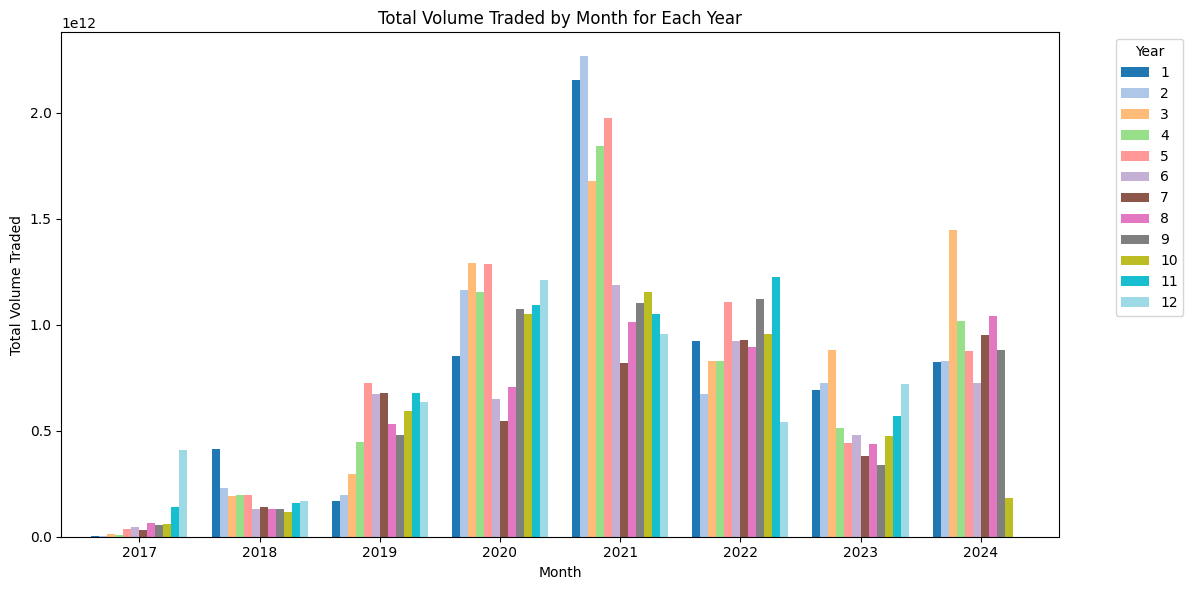

In [8]:
monthly_volume = btc_analyzing.groupby(['Year', 'Month'])['Volume'].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_volume.plot(kind='bar', width=0.8, ax=plt.gca(), colormap='tab20')
plt.xlabel('Month')
plt.ylabel('Total Volume Traded')
plt.title('Total Volume Traded by Month for Each Year')
plt.xticks(rotation=0)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**plt.figure(figsize=(12, 6)):**

Fungsi figure() digunakan untuk membuat plot baru, dan argumen figsize menentukan ukuran plot dalam satuan inci. Dalam hal ini, ukuran plot yang digunakan adalah 12x6 inci untuk memberikan ruang yang cukup agar grafik lebih jelas dan mudah dibaca.

**plt.plot(btc_analyzing['Date'], btc_analyzing['High'], label='High', color='blue', marker='o'):**

Fungsi plot() digunakan untuk membuat grafik garis.

btc_analyzing['Date'] adalah data pada sumbu x yang menunjukkan tanggal.
btc_analyzing['High'] adalah data pada sumbu y yang menunjukkan nilai tertinggi (High).
label='High' memberikan label pada garis untuk keperluan legenda.
color='blue' menentukan warna garis menjadi biru.
marker='o' menambahkan marker berbentuk lingkaran pada setiap titik data untuk meningkatkan visibilitas.

**plt.plot(btc_analyzing['Date'], btc_analyzing['Low'], label='Low', color='orange', marker='o'):**

Fungsi plot() ini mirip dengan yang sebelumnya, tetapi digunakan untuk menggambarkan nilai terendah (Low).

btc_analyzing['Low'] adalah data pada sumbu y yang menunjukkan nilai terendah.
label='Low' memberikan label pada garis untuk keperluan legenda.
color='orange' menentukan warna garis menjadi oranye.
marker='o' juga menambahkan marker berbentuk lingkaran pada setiap titik data.

**plt.title('High and Low Values Over Time'):**

Fungsi title() digunakan untuk menambahkan judul pada plot, dalam hal ini judul yang ditambahkan adalah 'High and Low Values Over Time'.

**plt.xlabel('Date'):**

Fungsi xlabel() digunakan untuk menambahkan label pada sumbu x, dalam hal ini label yang ditambahkan adalah 'Date'.

**plt.ylabel('Value'):**

Fungsi ylabel() digunakan untuk menambahkan label pada sumbu y, dalam hal ini label yang ditambahkan adalah 'Value'.

**plt.xticks(rotation=45):**

Fungsi xticks() digunakan untuk mengatur rotasi label pada sumbu x, dalam hal ini rotasi diatur ke 45 derajat agar label tanggal ditampilkan miring dan lebih mudah dibaca.

**plt.legend():**

Fungsi legend() digunakan untuk menampilkan legenda pada plot, yang akan menunjukkan label untuk garis 'High' dan 'Low' yang telah ditentukan sebelumnya.

**plt.grid():**

Fungsi grid() digunakan untuk menambahkan garis kisi pada plot, yang membantu dalam membaca nilai dan memperjelas visualisasi data.

**plt.tight_layout():**

Fungsi tight_layout() digunakan untuk mengatur layout plot agar lebih rapi dan tidak ada elemen yang saling tumpang tindih, sehingga meningkatkan keterbacaan.

**plt.show():**

Fungsi show() dari perpustakaan matplotlib digunakan untuk menampilkan plot yang telah dibuat.

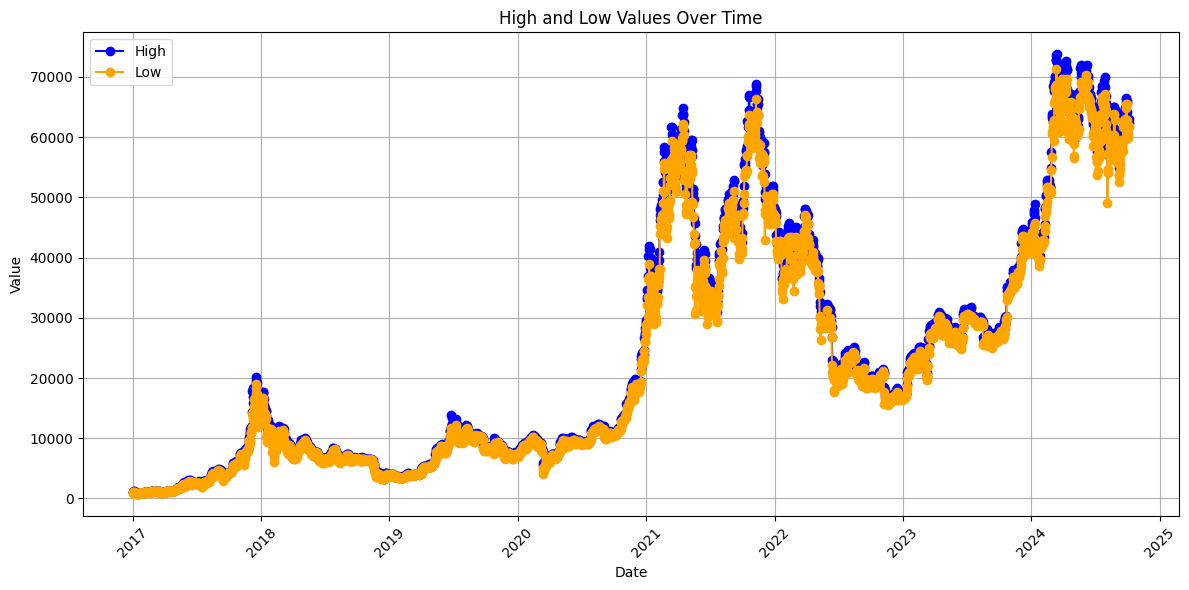

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(btc_analyzing ['Date'], btc_analyzing ['High'], label='High', color='blue', marker='o')
plt.plot(btc_analyzing ['Date'], btc_analyzing ['Low'], label='Low', color='orange', marker='o')
plt.title('High and Low Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**def filter_by_date(year):**

Fungsi filter_by_date() didefinisikan untuk memfilter DataFrame berdasarkan tahun yang diberikan sebagai argumen.

year adalah parameter yang digunakan untuk menentukan tahun yang ingin difilter.
Di dalam fungsi, DataFrame btc difilter sehingga hanya menyisakan baris yang memiliki tahun yang sama dengan year yang diberikan.

**filtered_btc = btc[(btc['Date'].dt.year == year)]:**

Baris ini melakukan pemfilteran pada DataFrame btc.

btc['Date'].dt.year mengambil tahun dari kolom 'Date'.
Kondisi == year memeriksa apakah tahun tersebut sama dengan tahun yang diberikan.
Hasilnya adalah DataFrame baru filtered_btc yang hanya berisi data dari tahun yang ditentukan.

**return filtered_btc[['Date', 'High', 'Low']]:**

Fungsi ini mengembalikan DataFrame yang hanya berisi kolom 'Date', 'High', dan 'Low' dari filtered_btc, sehingga hanya informasi yang relevan yang disimpan.

**year = 2023:**

Variabel year diatur ke 2023, yang akan digunakan sebagai argumen untuk memfilter data.

**result = filter_by_date(year):**

Baris ini memanggil fungsi filter_by_date() dengan argumen year, dan menyimpan hasilnya dalam variabel result. result sekarang berisi data BTC untuk tahun 2023.

**plt.figure(figsize=(10, 5)):**

Fungsi figure() digunakan untuk membuat plot baru, dengan ukuran 10x5 inci untuk memberikan ruang yang cukup agar grafik lebih jelas dan mudah dibaca.

**plt.plot(result['Date'], result['High'], marker='o', label='High', color='orange'):**

Fungsi plot() digunakan untuk membuat grafik garis untuk nilai tertinggi (High).

result['Date'] adalah data pada sumbu x yang menunjukkan tanggal.
result['High'] adalah data pada sumbu y yang menunjukkan nilai tertinggi.
marker='o' menambahkan marker berbentuk lingkaran pada setiap titik data untuk meningkatkan visibilitas.
label='High' memberikan label pada garis untuk keperluan legenda.
color='orange' menentukan warna garis menjadi oranye.

**plt.plot(result['Date'], result['Low'], marker='o', label='Low', color='blue'):**

Fungsi plot() ini mirip dengan yang sebelumnya, tetapi digunakan untuk menggambarkan nilai terendah (Low).

result['Low'] adalah data pada sumbu y yang menunjukkan nilai terendah.
label='Low' memberikan label pada garis untuk keperluan legenda.
color='blue' menentukan warna garis menjadi biru.

**plt.title(f'High and Low Values for {result["Date"].dt.strftime("%Y").iloc[0]}'):**

Fungsi title() digunakan untuk menambahkan judul pada plot. Judul diambil dari tahun yang terdapat dalam DataFrame result, menggunakan format string untuk menampilkan tahun yang sesuai.

**plt.xlabel('Date'):**

Fungsi xlabel() digunakan untuk menambahkan label pada sumbu x, dalam hal ini label yang ditambahkan adalah 'Date'.

**plt.ylabel('Values'):**

Fungsi ylabel() digunakan untuk menambahkan label pada sumbu y, dalam hal ini label yang ditambahkan adalah 'Values'.

**plt.xticks(rotation=45):**

Fungsi xticks() digunakan untuk mengatur rotasi label pada sumbu x, dalam hal ini rotasi diatur ke 45 derajat agar label tanggal ditampilkan miring dan lebih mudah dibaca.

**plt.legend():**

Fungsi legend() digunakan untuk menampilkan legenda pada plot, yang akan menunjukkan label untuk garis 'High' dan 'Low' yang telah ditentukan sebelumnya.

**plt.grid():**

Fungsi grid() digunakan untuk menambahkan garis kisi pada plot, yang membantu dalam membaca nilai dan memperjelas visualisasi data.

**plt.tight_layout():**

Fungsi tight_layout() digunakan untuk mengatur layout plot agar lebih rapi dan tidak ada elemen yang saling tumpang tindih, sehingga meningkatkan keterbacaan.

**plt.show():**

Fungsi show() dari perpustakaan matplotlib digunakan untuk menampilkan plot yang telah dibuat.

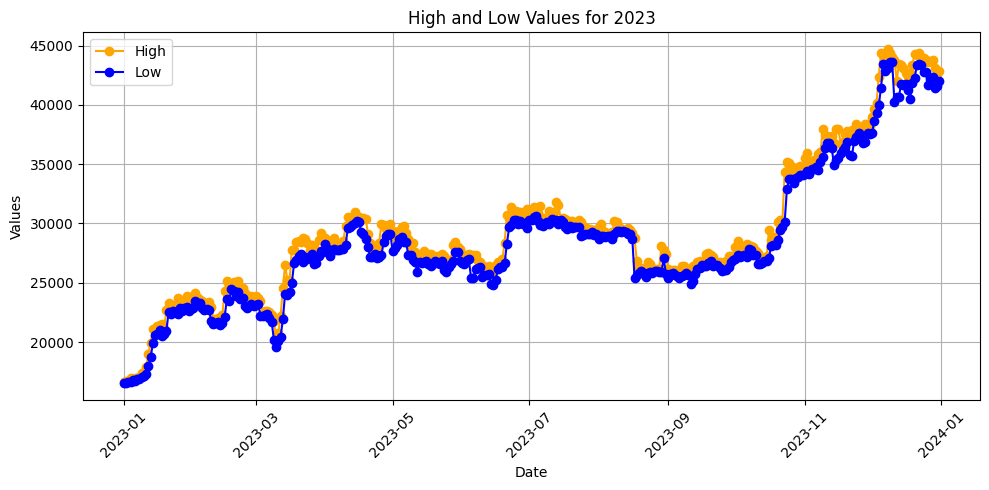

In [10]:
def filter_by_date(year):
    # Filter the DataFrame based on the specified year and month
    filtered_btc = btc[(btc['Date'].dt.year == year)]

    return filtered_btc[['Date', 'High', 'Low']]

year =2023
result = filter_by_date(year)

plt.figure(figsize=(10, 5))
plt.plot(result['Date'], result['High'], marker='o', label='High', color='orange')
plt.plot(result['Date'], result['Low'], marker='o', label='Low', color='blue')
plt.title(f'High and Low Values for {result["Date"].dt.strftime("%Y").iloc[0]}')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**def filter_by_date(year, month):**

Fungsi filter_by_date() didefinisikan untuk memfilter DataFrame berdasarkan tahun dan bulan yang diberikan sebagai argumen.

year dan month adalah parameter yang digunakan untuk menentukan tahun dan bulan yang ingin difilter.

**filtered_btc = btc[(btc['Date'].dt.year == year) & (btc['Date'].dt.month == month)]:**

Baris ini melakukan pemfilteran pada DataFrame btc.

btc['Date'].dt.year mengambil tahun dari kolom 'Date'.
btc['Date'].dt.month mengambil bulan dari kolom 'Date'.
Kondisi & digunakan untuk memastikan kedua kondisi (tahun dan bulan) terpenuhi.
Hasilnya adalah DataFrame baru filtered_btc yang hanya berisi data dari tahun dan bulan yang ditentukan.

**return filtered_btc[['Date', 'High', 'Low']]:**

Fungsi ini mengembalikan DataFrame yang hanya berisi kolom 'Date', 'High', dan 'Low' dari filtered_btc, sehingga hanya informasi yang relevan yang disimpan.

**year = 2021; month = 10:**

Variabel year diatur ke 2021 dan month diatur ke 10 (Oktober), yang akan digunakan sebagai argumen untuk memfilter data.

**result = filter_by_date(year, month):**

Baris ini memanggil fungsi filter_by_date() dengan argumen year dan month, dan menyimpan hasilnya dalam variabel result. result sekarang berisi data BTC untuk bulan Oktober 2021.

**plt.figure(figsize=(10, 5)):**

Fungsi figure() digunakan untuk membuat plot baru, dengan ukuran 10x5 inci untuk memberikan ruang yang cukup agar grafik lebih jelas dan mudah dibaca.

**plt.plot(result['Date'], result['High'], marker='o', label='High', color='orange'):**

Fungsi plot() digunakan untuk membuat grafik garis untuk nilai tertinggi (High).

result['Date'] adalah data pada sumbu x yang menunjukkan tanggal.
result['High'] adalah data pada sumbu y yang menunjukkan nilai tertinggi.
marker='o' menambahkan marker berbentuk lingkaran pada setiap titik data untuk meningkatkan visibilitas.
label='High' memberikan label pada garis untuk keperluan legenda.
color='orange' menentukan warna garis menjadi oranye.

**plt.plot(result['Date'], result['Low'], marker='o', label='Low', color='blue'):**

Fungsi plot() ini mirip dengan yang sebelumnya, tetapi digunakan untuk menggambarkan nilai terendah (Low).

result['Low'] adalah data pada sumbu y yang menunjukkan nilai terendah.
label='Low' memberikan label pada garis untuk keperluan legenda.
color='blue' menentukan warna garis menjadi biru.

**plt.title(f'High and Low Values for {result["Date"].dt.strftime("%B %Y").iloc[0]}'):**

Fungsi title() digunakan untuk menambahkan judul pada plot. Judul diambil dari bulan dan tahun yang terdapat dalam DataFrame result, menggunakan format string untuk menampilkan bulan dan tahun yang sesuai.

**plt.xlabel('Date'):**

Fungsi xlabel() digunakan untuk menambahkan label pada sumbu x, dalam hal ini label yang ditambahkan adalah 'Date'.

**plt.ylabel('Values'):**

Fungsi ylabel() digunakan untuk menambahkan label pada sumbu y, dalam hal ini label yang ditambahkan adalah 'Values'.

**plt.xticks(rotation=45):**

Fungsi xticks() digunakan untuk mengatur rotasi label pada sumbu x, dalam hal ini rotasi diatur ke 45 derajat agar label tanggal ditampilkan miring dan lebih mudah dibaca.

**plt.legend():**

Fungsi legend() digunakan untuk menampilkan legenda pada plot, yang akan menunjukkan label untuk garis 'High' dan 'Low' yang telah ditentukan sebelumnya.

**plt.grid():**

Fungsi grid() digunakan untuk menambahkan garis kisi pada plot, yang membantu dalam membaca nilai dan memperjelas visualisasi data.

**plt.tight_layout():**

Fungsi tight_layout() digunakan untuk mengatur layout plot agar lebih rapi dan tidak ada elemen yang saling tumpang tindih, sehingga meningkatkan keterbacaan.

**plt.show():**

Fungsi show() dari perpustakaan matplotlib digunakan untuk menampilkan plot yang telah dibuat.

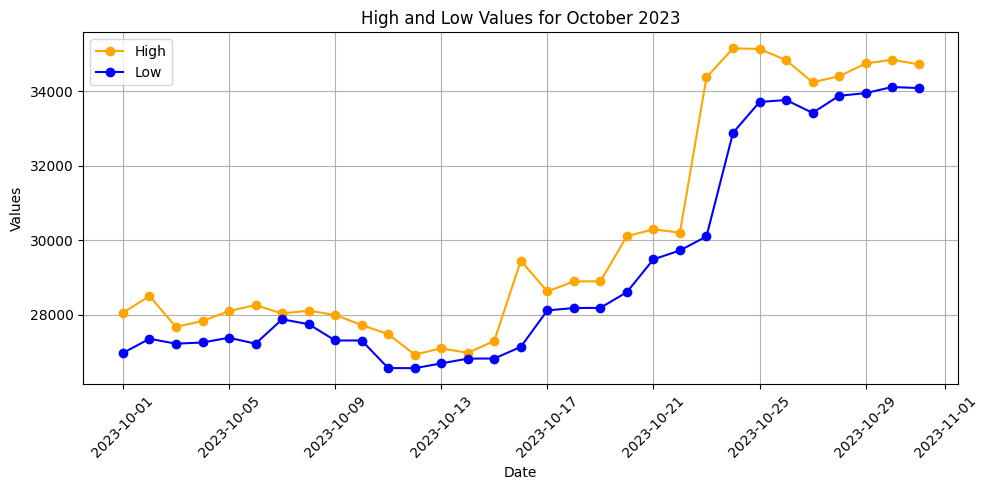

In [11]:
def filter_by_date(year, month):

    filtered_btc = btc[(btc['Date'].dt.year == year) & (btc['Date'].dt.month == month)]

    return filtered_btc[['Date', 'High', 'Low']]

# EDIT YEAR AND MONTH HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
year =2023
month = 10
result = filter_by_date(year, month)

plt.figure(figsize=(10, 5))
plt.plot(result['Date'], result['High'], marker='o', label='High', color='orange')
plt.plot(result['Date'], result['Low'], marker='o', label='Low', color='blue')
plt.title(f'High and Low Values for {result["Date"].dt.strftime("%B %Y").iloc[0]}')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**btc_open_close = btc.copy():**

Baris ini membuat salinan dari DataFrame btc dan menyimpannya dalam variabel btc_open_close. Tujuannya adalah untuk menghindari perubahan pada DataFrame asli saat menambahkan kolom baru.

**btc_open_close['Year'] = btc_open_close['Date'].dt.year:**

Baris ini menambahkan kolom baru bernama 'Year' ke DataFrame btc_open_close.

**btc_open_close['Date'].dt.year** mengambil tahun dari kolom 'Date' dan menyimpannya dalam kolom 'Year'.
**btc_open_close['Month'] = btc_open_close['Date'].dt.month:**

Baris ini menambahkan kolom baru bernama 'Month' ke DataFrame btc_open_close.

**btc_open_close['Date'].dt.month** mengambil bulan dari kolom 'Date' dan menyimpannya dalam kolom 'Month'.
**btc_open_close['Difference'] = btc_open_close['Close'] - btc_open_close['Open']:**

Baris ini menambahkan kolom baru bernama 'Difference' yang menghitung selisih antara kolom 'Close' dan 'Open'.

**btc_open_close['Close'] - btc_open_close['Open']** menghitung perbedaan antara harga penutupan dan harga pembukaan.

**specific_dates = btc_open_close[(btc_open_close['Date'].dt.month == 9) & (btc_open_close['Date'].dt.day == 17)]:**

Baris ini memfilter DataFrame btc_open_close untuk mendapatkan data hanya pada tanggal 17 September.

**btc_open_close['Date'].dt.month == 9** memeriksa apakah bulan adalah September.

**btc_open_close['Date'].dt.day == 17** memeriksa apakah hari adalah 17.
Hasilnya disimpan dalam variabel specific_dates.
if not specific_dates.empty:

Pernyataan ini memeriksa apakah DataFrame specific_dates tidak kosong. Jika tidak kosong, maka kode di dalam blok ini akan dieksekusi.

**month_str = specific_dates['Date'].dt.strftime('%B').iloc[0]:**

Baris ini mengambil nama bulan dari kolom 'Date' dalam specific_dates dan menyimpannya dalam variabel month_str.

strftime('%B') mengubah format tanggal menjadi nama bulan.
iloc[0] mengambil nama bulan dari baris pertama.

**day = specific_dates['Date'].dt.day.iloc[0]:**

Baris ini mengambil nilai hari dari kolom 'Date' dalam specific_dates dan menyimpannya dalam variabel day.

dt.day mengambil hari dari tanggal.
iloc[0] mengambil nilai hari dari baris pertama.

**print(f"Month: {month_str}, Day: {day}"):**

Baris ini mencetak nama bulan dan hari yang telah diambil sebelumnya, menggunakan format string untuk menyusun pesan.

**fig, ax = plt.subplots(figsize=(10, 6)):**

Baris ini membuat figure dan axes baru untuk plot dengan ukuran 10x6 inci, yang akan digunakan untuk menggambar grafik batang.

**bars = ax.bar(specific_dates['Year'], specific_dates['Difference'], color='green'):**

Baris ini membuat grafik batang menggunakan data dari specific_dates.

specific_dates['Year'] digunakan sebagai sumbu x (tahun).
specific_dates['Difference'] digunakan sebagai sumbu y (selisih antara harga penutupan dan pembukaan).
color='green' menentukan warna batang menjadi hijau.
for bar in bars:

Loop ini digunakan untuk mengiterasi setiap batang dalam grafik batang yang telah dibuat.

**yval = bar.get_height():**

Baris ini mengambil tinggi batang saat ini (nilai selisih) dan menyimpannya dalam variabel yval.

**ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom'):**

Baris ini menambahkan anotasi pada setiap batang dengan nilai selisih.

bar.get_x() + bar.get_width()/2 menentukan posisi horizontal untuk menempatkan teks di tengah batang.
yval adalah posisi vertikal di atas batang.
round(yval, 2) membulatkan nilai selisih menjadi dua desimal.
ha='center' dan va='bottom' mengatur perataan teks agar berada di tengah dan sedikit di atas batang.
**ax.set_title(f'Open-Close Price Differences for {month_str} {day} across Years'):**

Fungsi ini mengatur judul plot dengan menyertakan nama bulan dan hari yang telah diambil sebelumnya.

**ax.set_xlabel('Year'):**

Fungsi ini menambahkan label pada sumbu x dengan teks 'Year'.

**ax.set_ylabel('Difference (Close - Open)'):**

Fungsi ini menambahkan label pada sumbu y dengan teks 'Difference (Close - Open)', yang menjelaskan bahwa nilai pada sumbu y menunjukkan selisih antara harga penutupan dan harga pembukaan.

**table_data = specific_dates[['Year', 'Open', 'Close']].values:**

Baris ini mengambil data dari kolom 'Year', 'Open', dan 'Close' dalam DataFrame specific_dates dan menyimpannya dalam variabel table_data sebagai array NumPy. Data ini akan digunakan untuk membuat tabel di plot.

**column_labels = ['Year', 'Open', 'Close']:**

Baris ini mendefinisikan daftar label kolom untuk tabel yang akan ditampilkan di plot. Label ini mencakup 'Year', 'Open', dan 'Close'.

**table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='bottom', bbox=[0, -0.7, 1, 0.5]):**

Baris ini membuat tabel di plot menggunakan fungsi plt.table().

cellText=table_data mengisi tabel dengan data yang telah diambil sebelumnya.
colLabels=column_labels menetapkan label kolom untuk tabel.
cellLoc='center' mengatur posisi teks di dalam sel tabel agar berada di tengah.
loc='bottom' menentukan lokasi tabel di bagian bawah plot.
bbox=[0, -0.7, 1, 0.5] mengatur batas tabel dengan format [x0, y0, width, height], sehingga tabel tidak tumpang tindih dengan grafik.
plt.subplots_adjust(left=0.1, bottom=0.3):

Baris ini mengatur pengaturan layout subplot untuk memberikan ruang yang cukup di sisi kiri dan bagian bawah plot, sehingga elemen-elemen plot tidak saling tumpang tindih.

**plt.show():**

Fungsi ini digunakan untuk menampilkan plot yang telah dibuat, termasuk grafik batang dan tabel yang ditambahkan. Setelah baris ini dieksekusi, pengguna akan melihat visualisasi yang menggambarkan selisih harga penutupan dan pembukaan pada tanggal 17 September dari tahun yang berbeda.

Month: September, Day: 17


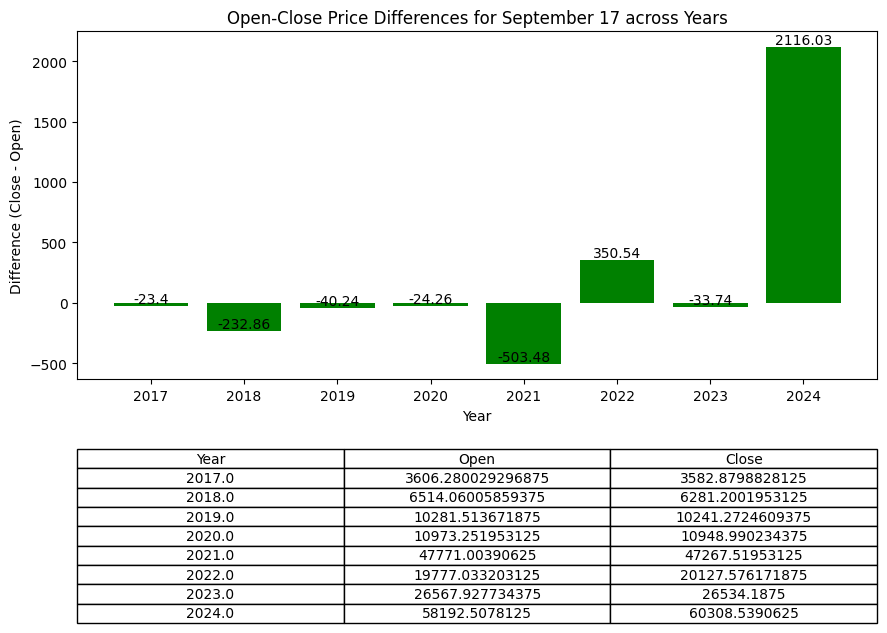

In [12]:
btc_open_close = btc.copy()

# Tambahkan kolom 'Year', 'Month', dan 'Difference'
btc_open_close['Year'] = btc_open_close['Date'].dt.year
btc_open_close['Month'] = btc_open_close['Date'].dt.month
btc_open_close['Difference'] = btc_open_close['Close'] - btc_open_close['Open']

specific_dates = btc_open_close[(btc_open_close['Date'].dt.month == 9) & (btc_open_close['Date'].dt.day == 17)]         # EDIT MONTH AND DATE HERE !!!!!!!!!!!!!!!!!!!


if not specific_dates.empty:
    month_str = specific_dates['Date'].dt.strftime('%B').iloc[0]
    day = specific_dates['Date'].dt.day.iloc[0]
    print(f"Month: {month_str}, Day: {day}")

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(specific_dates['Year'], specific_dates['Difference'], color='green')

# Annotate each bar with the exact difference value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

ax.set_title(f'Open-Close Price Differences for {month_str} {day} across Years')
ax.set_xlabel('Year')
ax.set_ylabel('Difference (Close - Open)')

table_data = specific_dates[['Year', 'Open', 'Close']].values
column_labels = ['Year', 'Open', 'Close']
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='bottom', bbox=[0, -0.7, 1, 0.5])

plt.subplots_adjust(left=0.1, bottom=0.3)

plt.show()

Baris ini digunakan untuk menghitung dan menampilkan histogram dari kolom-kolom numerik dalam DataFrame btc, dengan beberapa pengecualian.

**btc.select_dtypes(include='number')** memilih semua kolom dalam DataFrame btc yang memiliki tipe data numerik.
**.columns.difference(['Date'])** menghapus kolom 'Date' dari daftar kolom yang akan digunakan, sehingga hanya kolom numerik lainnya yang akan ditampilkan dalam histogram.

**bins=50** menentukan jumlah bin (kotak) dalam histogram, yaitu 50 bin.

**figsize=(20, 15)** mengatur ukuran figure histogram menjadi 20 inci lebar dan 15 inci tinggi.

**grid=False** menonaktifkan tampilan grid pada plot histogram.

**plt.show():**

Fungsi ini digunakan untuk menampilkan histogram yang telah dibuat.

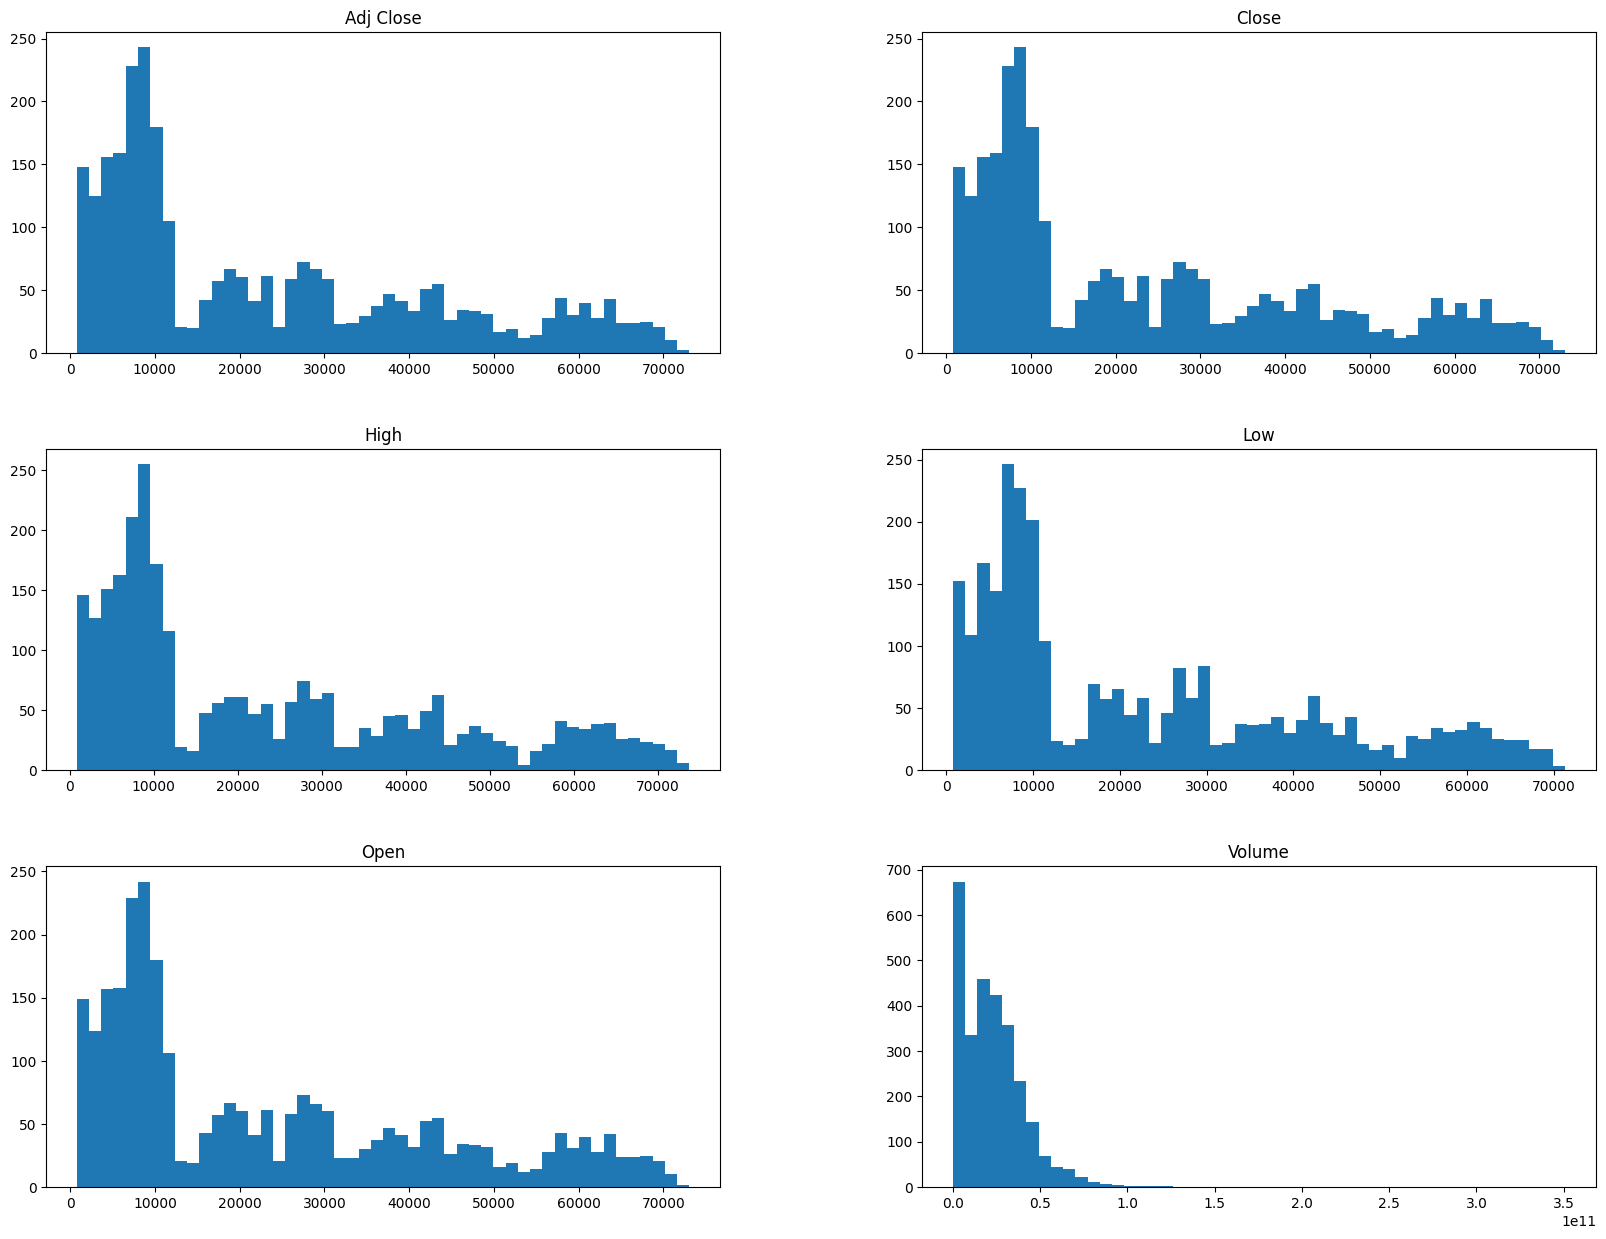

In [13]:
# Menghitung histogram untuk kolom numerik kecuali 'Date'
btc.hist(bins=50, figsize=(20, 15), grid=False, column=btc.select_dtypes(include='number').columns.difference(['Date']))

# Menampilkan plot
plt.show()

**sns.pairplot(btc):**

Fungsi pairplot() dari perpustakaan seaborn digunakan untuk membuat matriks plot yang menunjukkan hubungan antara semua kombinasi fitur numerik dalam DataFrame btc. Ini sangat berguna untuk eksplorasi data dan visualisasi hubungan antar variabel.

**diag_kind='kde':**

Parameter ini menentukan jenis plot yang akan digunakan pada diagonal (diagonal utama) dari matriks. Dengan diag_kind='kde', plot yang ditampilkan adalah estimasi kepadatan kernel (KDE) yang memberikan gambaran tentang distribusi setiap fitur numerik.

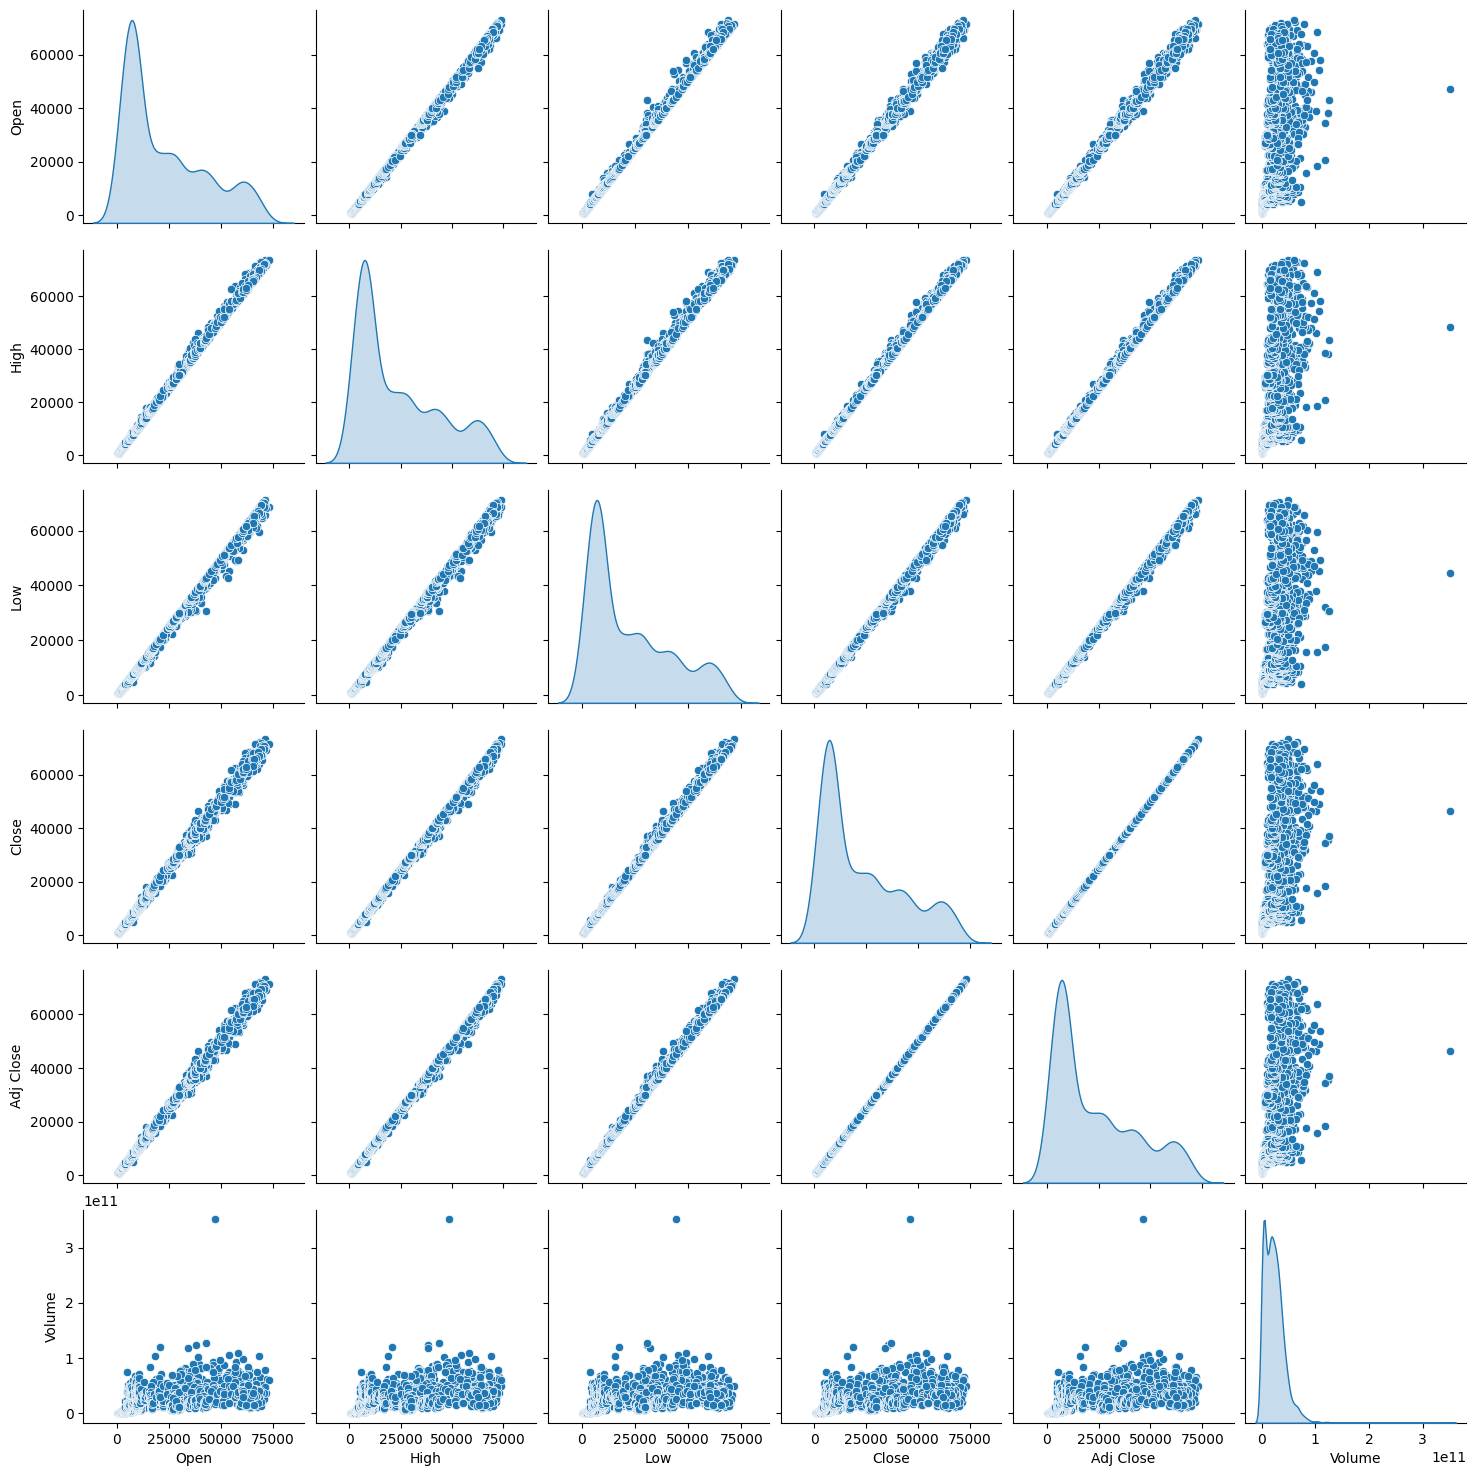

In [14]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(btc, diag_kind = 'kde')

In [15]:
numerical_features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

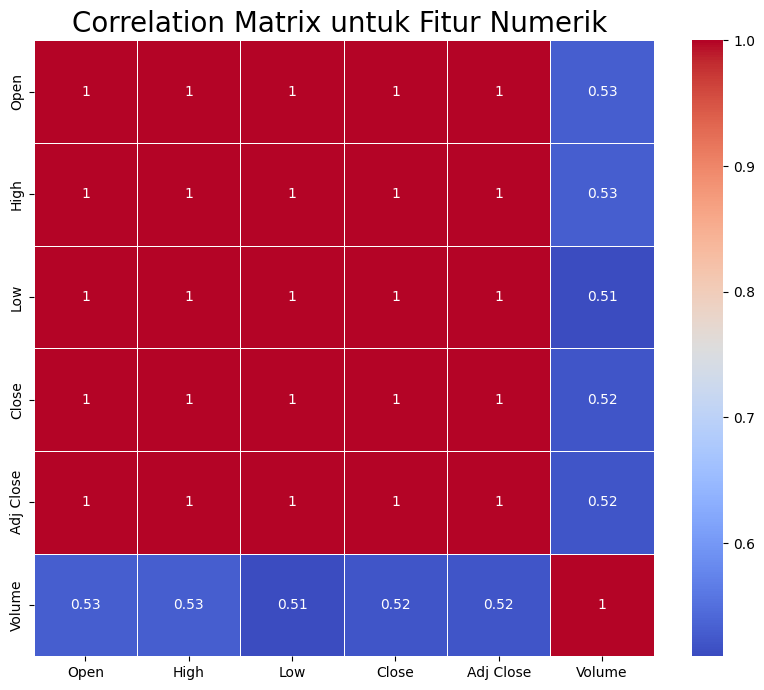

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = btc[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# **4. Data Cleaning**

**Penghitungan Nilai 0:** (btc.Open == 0).sum(): Menghitung jumlah nilai 0 di kolom Open dari DataFrame btc.
Proses yang sama dilakukan untuk kolom High, Low, Close, dan Volume, menghasilkan variabel high, low, close, dan volume.

**print():** Menampilkan hasil jumlah nilai 0 untuk setiap kolom yang telah dihitung sebelumnya.

disini saya menginisiasi ulang variabel btc untuk kebutuhan pelatihan model time serier untuk memprediksi harga bitcoin setelah sebelumnya variabel btc digunakan untuk EDA (Exploratory Data Analysis)

Kode ini digunakan untuk membaca data dari file CSV yang berisi data saham Bitcoin (BTC-USD) dan menyimpannya dalam DataFrame Pandas. Mari kita uraikan langkah demi langkah:

**pd.read_csv(...):** Ini adalah fungsi dari pustaka Pandas untuk membaca data dari file CSV.

**'/content/BTC-USD_stock_data.csv':** Ini adalah path ke file CSV yang berisi data Bitcoin. Anda perlu memastikan bahwa path ini benar dan file CSV ada di lokasi yang benar.

**index_col='Date':** Ini menunjukkan bahwa kolom 'Date' dalam file CSV harus digunakan sebagai indeks untuk DataFrame. Ini akan membuat setiap baris dalam DataFrame dikaitkan dengan tanggal tertentu.

**parse_dates=['Date']:** Ini mengonversi kolom 'Date' menjadi objek datetime. Ini memungkinkan Anda untuk melakukan manipulasi waktu dan tanggal pada data dengan lebih mudah.

**btc = ...:** Ini menyimpan DataFrame yang dihasilkan dalam variabel btc, sehingga Anda dapat mengakses dan menganalisis data Bitcoin.

In [17]:
btc = pd.read_csv('/content/BTC-USD_stock_data.csv',index_col='Date',parse_dates=['Date'])
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...
2024-10-02,60836.324219,62357.687500,59996.949219,60632.785156,60632.785156,40762722398
2024-10-03,60632.484375,61469.039062,59878.804688,60759.402344,60759.402344,36106447279
2024-10-04,60754.625000,62465.992188,60459.941406,62067.476562,62067.476562,29585472513


In [18]:
open = (btc.Open == 0).sum()
high = (btc.High == 0).sum()
low = (btc.Low == 0).sum()
close = (btc.Close == 0).sum()
volume = (btc.Volume == 0).sum()

print("Nilai 0 di kolom x ada: ", open)
print("Nilai 0 di kolom y ada: ", high)
print("Nilai 0 di kolom z ada: ", low)
print("Nilai 0 di kolom x ada: ", close)
print("Nilai 0 di kolom z ada: ", volume)

Nilai 0 di kolom x ada:  0
Nilai 0 di kolom y ada:  0
Nilai 0 di kolom z ada:  0
Nilai 0 di kolom x ada:  0
Nilai 0 di kolom z ada:  0


**btc.duplicated().sum():**



*   Fungsi duplicated() digunakan untuk mengidentifikasi baris yang duplikat dalam DataFrame btc.

*   Metode ini mengembalikan sebuah Series boolean yang menunjukkan True untuk baris yang merupakan duplikat.
*   Dengan menggunakan .sum(), kita menghitung jumlah baris yang duplikat.








In [19]:
btc.duplicated().sum()

0

**btc.isnull().sum():**

*   Fungsi isnull() digunakan untuk mendeteksi nilai yang hilang (null) dalam DataFrame btc.
*   Metode ini mengembalikan sebuah Series boolean yang menunjukkan True untuk nilai yang hilang.
*   Dengan menggunakan .sum(), kita menghitung jumlah nilai yang hilang di setiap kolom dalam DataFrame.

In [20]:
btc.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


**btc.drop_duplicates():**

Fungsi ini digunakan untuk menghapus baris yang duplikat dari DataFrame btc_cleaned.
Hasilnya adalah DataFrame baru yang tidak memiliki baris duplikat.

**btc_cleaned.dropna():**

Fungsi ini digunakan untuk menghapus baris yang memiliki nilai hilang (NaN) dari DataFrame btc_cleaned.
Hasilnya adalah DataFrame baru yang tidak memiliki nilai hilang.

**btc_leaned.info():**

Fungsi ini memberikan ringkasan informasi tentang DataFrame btc_cleaned, termasuk jumlah total baris, jumlah kolom, dan tipe data dari setiap kolom.

**KODE DIBAWAH AKAN MENGHAPUS DUPLIKAT DAN NILAI NAN, KARENA DARI ANALASIS SEBELUMNYA TIDAK ADA DATA YANG DUPLIKAT ATAU NAN MAKA TIDAK ADA YANG DIHAPUS**

In [21]:
btc_cleaned = btc.drop_duplicates() # Removing Duplicates,
btc_cleaned = btc_cleaned.dropna() # Removing Missing Values (NaN)
btc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2836 entries, 2017-01-01 to 2024-10-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2836 non-null   float64
 1   High       2836 non-null   float64
 2   Low        2836 non-null   float64
 3   Close      2836 non-null   float64
 4   Adj Close  2836 non-null   float64
 5   Volume     2836 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.1 KB


**btc.shape:**
Atribut shape dari DataFrame btc digunakan untuk menampilkan jumlah baris dan kolom dalam DataFrame tersebut.

Hasilnya biasanya ditampilkan dalam format (baris, kolom).

In [22]:
btc.shape

(2836, 6)

**btc.head():**

*   Fungsi head() digunakan untuk menampilkan beberapa baris pertama dari DataFrame btc.
*   Secara default, head() akan menampilkan 5 baris pertama, tetapi Anda juga dapat menentukan jumlah baris yang ingin ditampilkan dengan memberikan argumen.






In [23]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


**sns.boxplot():**

Fungsi boxplot() dari perpustakaan seaborn digunakan untuk membuat plot kotak (boxplot) yang menampilkan distribusi data.

**x=btc['Open']:**

Argumen x menentukan data yang akan digunakan untuk membuat plot. Dalam hal ini, kita menggunakan kolom 'Open' dari DataFrame btc.

<Axes: xlabel='Open'>

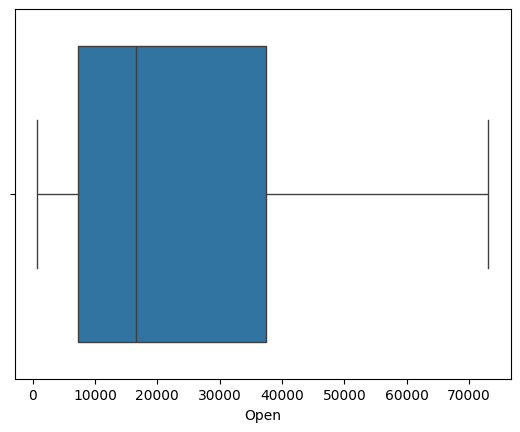

In [24]:
sns.boxplot(x=btc['Open'])

**sns.boxplot():**

Fungsi boxplot() dari perpustakaan seaborn digunakan untuk membuat plot kotak (boxplot) yang menampilkan distribusi data.

**x=btc['High']:**

Argumen x menentukan data yang akan digunakan untuk membuat plot. Dalam hal ini, kita menggunakan kolom 'High' dari DataFrame btc.

<Axes: xlabel='High'>

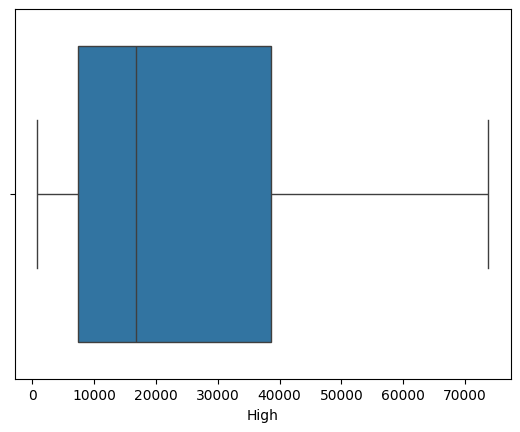

In [25]:
sns.boxplot(x=btc['High'])

**sns.boxplot():**

Fungsi boxplot() dari perpustakaan seaborn digunakan untuk membuat plot kotak (boxplot) yang menampilkan distribusi data.

**x=btc['Low']:**

Argumen x menentukan data yang akan digunakan untuk membuat plot. Dalam hal ini, kita menggunakan kolom 'Low' dari DataFrame btc.

<Axes: xlabel='Low'>

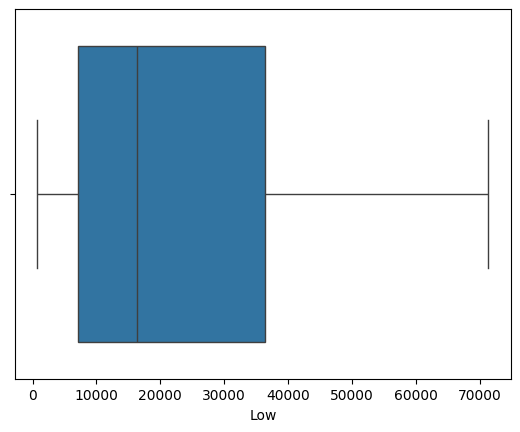

In [26]:
sns.boxplot(x=btc['Low'])

**sns.boxplot():**

Fungsi boxplot() dari perpustakaan seaborn digunakan untuk membuat plot kotak (boxplot) yang menampilkan distribusi data.

**x=btc['Close']:**

Argumen x menentukan data yang akan digunakan untuk membuat plot. Dalam hal ini, kita menggunakan kolom 'Close' dari DataFrame btc.

<Axes: xlabel='Close'>

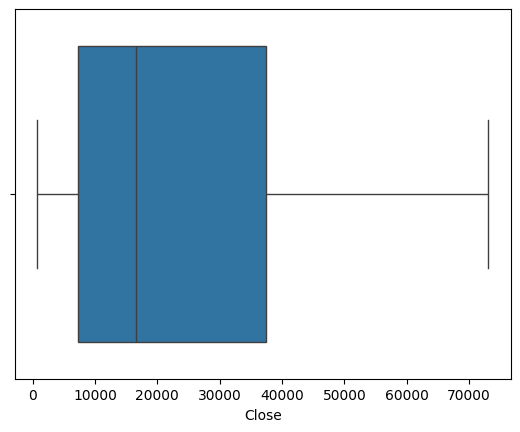

In [27]:
sns.boxplot(x=btc['Close'])

**sns.boxplot():**

Fungsi boxplot() dari perpustakaan seaborn digunakan untuk membuat plot kotak (boxplot) yang menampilkan distribusi data.

**x=btc['Adj Close']:**

Argumen x menentukan data yang akan digunakan untuk membuat plot. Dalam hal ini, kita menggunakan kolom 'Adj Close' dari DataFrame btc.

<Axes: xlabel='Adj Close'>

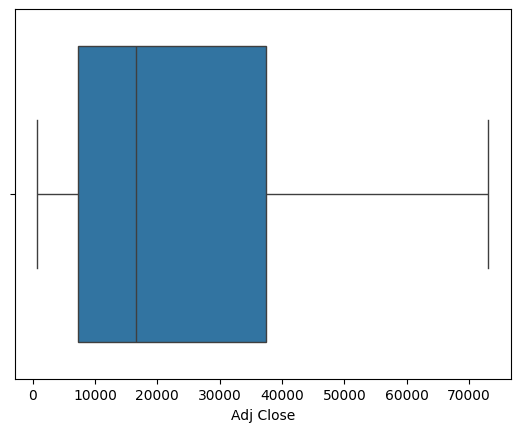

In [28]:
sns.boxplot(x=btc['Adj Close'])

**sns.boxplot():**

Fungsi boxplot() dari perpustakaan seaborn digunakan untuk membuat plot kotak (boxplot) yang menampilkan distribusi data.

**x=btc['Volume']:**

Argumen x menentukan data yang akan digunakan untuk membuat plot. Dalam hal ini, kita menggunakan kolom 'Volume' dari DataFrame btc.

<Axes: xlabel='Volume'>

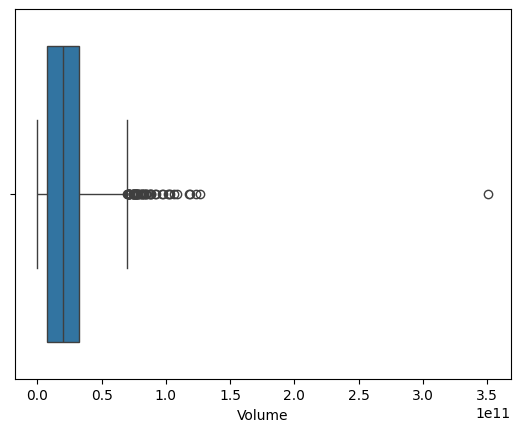

In [29]:
sns.boxplot(x=btc['Volume'])

**numerical_cols = btc.select_dtypes(include=[np.number]):**

Mengambil semua kolom numerik dari DataFrame btc. Ini berguna untuk fokus pada kolom yang dapat dianalisis secara statistik.

**Q1 = numerical_cols.quantile(0.25):**

Menghitung kuartil pertama (25%) dari kolom numerik, yang menunjukkan nilai di bawahnya 25% dari data.

**Q3 = numerical_cols.quantile(0.75):**

Menghitung kuartil ketiga (75%) dari kolom numerik, yang menunjukkan nilai di bawahnya 75% dari data.

**IQR = Q3 - Q1:**

Menghitung rentang interkuartil (IQR), yang digunakan untuk mengidentifikasi outlier.

 **btc = btc[~((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)]:**

Menghapus outlier dari DataFrame btc dengan cara:

*   Memeriksa apakah nilai dalam kolom numerik lebih kecil dari (Q1 - 1.5 \times IQR) atau lebih besar dari (Q3 + 1.5 \times IQR).
*   Menggunakan ~ untuk membalikkan kondisi, sehingga hanya baris yang tidak memenuhi kondisi outlier yang dipertahankan.

*   any(axis=1) memastikan bahwa jika ada satu kolom yang memenuhi kondisi outlier, baris tersebut akan dihapus.

**btc.shape:**

Mengembalikan ukuran (jumlah baris dan kolom) dari DataFrame btc setelah outlier dihapus.


In [30]:
numerical_cols = btc.select_dtypes(include=[np.number])
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1
btc = btc[~((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

btc.shape

(2780, 6)

**btc.hist():**

Fungsi hist() digunakan untuk membuat histogram dari DataFrame btc. Histogram adalah representasi visual dari distribusi data.

**bins=50:**

Argumen bins menentukan jumlah interval (bin) yang digunakan untuk mengelompokkan data dalam histogram. Dalam hal ini, kita menggunakan 50 bin.

**figsize=(20,15):**

Argumen figsize menentukan ukuran plot dalam satuan inci. Dalam hal ini, kita menggunakan ukuran 20x15 inci untuk membuat plot yang lebih besar dan lebih mudah dibaca.

**plt.show():**

Fungsi show() dari perpustakaan matplotlib digunakan untuk menampilkan plot.

# **5. Data Preparation**

Pada bagian ini kita akan melakukan empat tahap persiapan data untuk dilatip pada beberapa model machine learning', yaitu:
*   Reduksi dimensi dengan MinMaxScaler.
*   Pembagian dataset dengan fungsi train_test_split dari library sklearn.










Kode ini adalah untuk memplot prediksi harga Bitcoin dan menghitung akar kesalahan kuadrat (RMSE) untuk membandingkan prediksi dengan harga aktual.

**plot_pred(test,pred)**

Memlot data aktual (test) dengan warna merah dan data prediksi (pred) dengan warna biru.
Menambahkan judul, label sumbu x dan y, serta legenda ke plot.
Menampilkan plot.

**return_rmse(test,pred)**

Menghitung RMSE dari data aktual dan prediksi.

Mencetak RMSE.

In [46]:
from sklearn.metrics import mean_squared_error

def plot_pred(test,pred):
    plt.plot(test, color='r',label='Aktual Harga Bitcoin')
    plt.plot(pred, color='b',label='Prediksi Harga Bitcoin')
    plt.title('Prediksi Harga Bitcoin')
    plt.xlabel('Waktu')
    plt.ylabel('Harga Bitcoin')
    plt.legend()
    plt.show()

def return_rmse(test,pred):
    return math.sqrt(mean_squared_error(test,pred))


Kode ini membagi data Bitcoin (btc) ke dalam set pelatihan dan pengujian.

train_set berisi data Bitcoin hingga tahun 2020, menggunakan kolom kedua (indeks 1) dan kolom ketiga (indeks 2) dari dataframe.

test_set berisi data Bitcoin mulai tahun 2021, menggunakan kolom kedua (indeks 1) dan kolom ketiga (indeks 2) dari dataframe.

In [32]:
# Cek Missing Values
train_set = btc[:'2020'].iloc[:,1:2].values
test_set = btc['2021':].iloc[:,1:2].values

Kode ini membagi data harga BTC menjadi dua bagian: data pelatihan (tahun 2020) dan data pengujian (tahun 2021). Kemudian, ia menampilkan kedua data tersebut dalam satu plot, sehingga Anda dapat melihat perbedaannya.

Kode ini dapat membantu Anda memahami bagaimana harga BTC berubah dari waktu ke waktu. Anda juga dapat menggunakan kode ini untuk melihat bagaimana model Anda bekerja pada data pengujian.

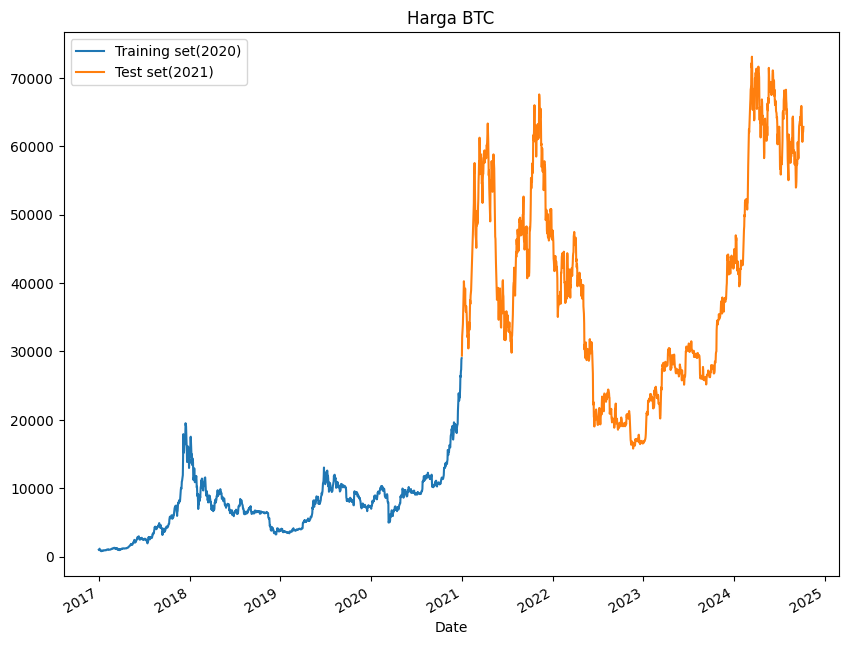

In [33]:
# Pilih atribut 'Close' untuk harga

btc['Close'][:'2020'].plot(figsize=(10,8),legend=True)
btc['Close']['2021':].plot(figsize=(10,8),legend=True)
plt.legend(['Training set(2020)','Test set(2021)'])
plt.title('Harga BTC')
plt.show()

Kode tersebut melakukan normalisasi data pada set pelatihan menggunakan MinMaxScaler.

MinMaxScaler adalah metode yang digunakan untuk menskalakan data ke dalam rentang tertentu (dalam hal ini 0 hingga 1). Hal ini memungkinkan data untuk memiliki skala yang sama, yang dapat membantu meningkatkan kinerja algoritma machine learning.

train_set_sc adalah variabel yang menyimpan data yang telah dinormalisasi.

In [34]:
# Skala untuk Training set

sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)

Mengembalikan ukuran (jumlah baris dan kolom) dari train_set_sc.

In [35]:
train_set_sc.shape

(1458, 1)

Kode ini membangun dataset pelatihan untuk jaringan saraf berulang (RNN), khususnya jaringan LSTM, untuk memprediksi harga saham. Mari kita pecah:

**x_train = [] dan y_train = []:** Ini mendeklarasikan dua list kosong, yang nantinya akan diisi dengan data pelatihan. 'x_train' akan menyimpan data input (harga saham masa lalu) dan 'y_train' akan menyimpan data target (harga saham masa depan).

**for i in range(60, 1458):** Ini memulai sebuah loop yang berulang dari indeks 60 hingga 1457, yang mewakili rentang data pelatihan.

**x_train.append(train_set_sc[i-60:i,0]):** Ini menambahkan data input ke list 'x_train'. train_set_sc[i-60:i,0] mengambil 60 data harga saham masa lalu (mulai dari 60 langkah waktu sebelumnya) dan memasukkannya sebagai satu contoh pelatihan.

train_set_sc adalah dataset pelatihan yang sudah diskalakan.

**[i-60:i,0]**mengambil data dari indeks i-60 hingga i (60 langkah waktu) dan kolom ke-0 (data harga saham).

**y_train.append(train_set_sc[i,0]):** Ini menambahkan data target ke list 'y_train'. train_set_sc[i,0] mengambil harga saham saat ini (pada indeks i) dan menambahkannya sebagai target yang ingin diprediksi model.

**x_train,y_train = np.array(x_train),np.array(y_train):** Ini mengubah list 'x_train' dan 'y_train' menjadi array NumPy, yang diperlukan untuk pelatihan model machine learning.

In [36]:
# Karena LSTM menyimpan status memori jangka panjang, kita membuat struktur data dengan 60 langkah waktu dan 1 keluaran
# Jadi untuk setiap elemen set pelatihan, kita memiliki 60 elemen set pelatihan sebelumnya

x_train = []
y_train = []
for i in range(60,1458):
    x_train.append(train_set_sc[i-60:i,0])
    y_train.append(train_set_sc[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

Kode tersebut mengubah bentuk array x_train menggunakan fungsi reshape. reshape mengubah bentuk array tanpa mengubah data di dalamnya. Dalam kasus ini, kode tersebut mengubah bentuk x_train menjadi (x_train.shape[0],x_train.shape[1],1), yang berarti:

x_train.shape[0] adalah jumlah baris dalam array.

x_train.shape[1] adalah jumlah kolom dalam array.

1 adalah jumlah elemen dalam dimensi ketiga.

In [37]:
# Membentuk ulang shape x_train

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

Kode ini digunakan untuk menyiapkan kumpulan pengujian dengan cara yang sama seperti kumpulan pelatihan untuk model pembelajaran mesin. Berikut adalah penjabaran rinci setiap baris kode:

**btc_total = pd.concat((btc['High'][:'2020'],btc['High']['2021':]),axis=0): **Ini menggabungkan data 'High' dari DataFrame 'btc' untuk tahun 2020 dan data 'High' dari tahun 2021.

**inputs = btc_total[len(btc_total)-len(test_set)-60:].values:** Ini mengambil 60 nilai terakhir dari 'btc_total' dan mengubahnya menjadi array NumPy.

**inputs = inputs.reshape(-1,1):** Ini membentuk kembali array 'inputs' menjadi array 2D dengan satu kolom.

**inputs = sc.transform(inputs):** Ini mengubah 'inputs' menggunakan objek sc yang sebelumnya telah diinisialisasi, kemungkinan besar sebagai scaler (misalnya, StandardScaler) untuk menskalakan data ke rentang tertentu.

**inputs.shape:** Ini mengembalikan bentuk dari array 'inputs' yang telah diubah, menunjukkan jumlah baris dan kolom.

In [38]:
# Sekarang untuk menyiapkan set pengujian dengan cara yang sama seperti set pelatihan.

# Berikut ini telah dilakukan sehingga 60 bagian set pengujian memiliki 60 nilai sebelumnya yang tidak mungkin diperoleh kecuali kita mengambil seluruh
# Data atribut 'Tinggi' untuk diproses

btc_total = pd.concat((btc['Close'][:'2020'],btc['Close']['2021':]),axis=0)
inputs = btc_total[len(btc_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(1382, 1)

# **6. Model Development**

Kode ini merupakan implementasi model Long Short-Term Memory (LSTM) untuk memprediksi harga saham. LSTM adalah jenis jaringan saraf yang efektif untuk menangani data deret waktu.

Deklarasi Model: Kode ini pertama-tama mendeklarasikan model LSTM menggunakan Sequential() dari library Keras.

Layer LSTM: Kode ini kemudian menambahkan beberapa layer LSTM ke model.
units: Parameter ini mendefinisikan jumlah unit dalam layer LSTM. Dalam kode ini, setiap layer LSTM memiliki 50 unit.

return_sequences: Parameter ini mendefinisikan apakah layer LSTM akan mengembalikan output untuk setiap langkah waktu atau hanya untuk langkah waktu terakhir. Dalam kode ini, tiga layer pertama LSTM diatur untuk mengembalikan output untuk setiap langkah waktu (return_sequences=True), sedangkan layer terakhir diatur untuk mengembalikan output hanya untuk langkah waktu terakhir (return_sequences=False).

input_shape: Parameter ini menentukan dimensi data input untuk layer LSTM pertama. Dalam kode ini, dimensi input adalah (x_train.shape[1], 1), yang berarti bahwa data input memiliki x_train.shape[1] langkah waktu dan 1 fitur.

Dropout: Kode ini menambahkan layer dropout ke model untuk mencegah overfitting. Dropout secara acak menonaktifkan sebagian neuron selama pelatihan.
Layer Dense: Kode ini menambahkan layer dense ke model sebagai layer output.

Layer dense ini memiliki 1 unit, yang sesuai dengan target prediksi.

Kompilasi Model: Kode ini mengkompilasi model menggunakan optimizer rmsprop dan fungsi kehilangan mean_squared_error.

Pelatihan Model: Kode ini melatih model menggunakan data pelatihan x_train dan y_train. Model dilatih selama 50 epoch dengan ukuran batch 32.

In [39]:
# Arsitektur LSTM
model_lstm = Sequential()

#1
model_lstm.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model_lstm.add(Dropout(0.2))

#2
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#3
model_lstm.add(LSTM(units=50,return_sequences=True))
model_lstm.add(Dropout(0.2))

#4
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))

#Output
model_lstm.add(Dense(units=1))

#Compile RNN
model_lstm.compile(optimizer='rmsprop',loss='mean_squared_error')

#Fit training set
model_lstm.fit(x_train,y_train,epochs=50,batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 0.0178
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0058
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0047
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0029
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0037
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.0034
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - loss: 0.0031
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0026
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0025
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0029
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0024
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 0.0025
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 0.0032
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0022
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step 

Kode ini adalah contoh model deep learning yang menggunakan arsitektur GRU (Gated Recurrent Unit) untuk memprediksi nilai saham.

Model: Model yang digunakan adalah model jaringan saraf berulang (RNN) dengan arsitektur GRU.

Input: Input model adalah data historis harga saham, yang di representasikan sebagai matriks dengan bentuk (jumlah sampel, jumlah waktu langkah, 1).

Layer: Model memiliki 4 layer GRU yang masing-masing memiliki 50 unit neuron.

Setiap layer diikuti dengan dropout layer untuk mencegah overfitting.

Output: Output model adalah prediksi harga saham.

Kompilasi: Model dikompilasi dengan menggunakan optimizer SGD (Stochastic Gradient Descent) dan fungsi loss 'mean_squared_error' untuk mengukur kesalahan prediksi.

Training: Model dilatih dengan menggunakan data training yang diberikan. Jumlah epoch adalah 50, artinya model dilatih selama 50 kali iterasi pada seluruh dataset.

Ukuran batch adalah 150, artinya model memperbarui parameternya berdasarkan 150 sampel data pada setiap iterasi.

In [40]:
#Arsitektur GRU
model_gru = Sequential()

#1
model_gru.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model_gru.add(Dropout(0.2))

#2
model_gru.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model_gru.add(Dropout(0.2))

#3
model_gru.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model_gru.add(Dropout(0.2))

#4
model_gru.add(GRU(units=50,activation='tanh'))
model_gru.add(Dropout(0.2))

#Output
model_gru.add(Dense(units=1))

#Compile RNN
model_gru.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

# Fit untuk training test
model_gru.fit(x_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - loss: 0.0610
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - loss: 0.0326
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - loss: 0.0231
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - loss: 0.0201
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - loss: 0.0184
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - loss: 0.0177
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - loss: 0.0145
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 408ms/step - loss: 0.0133
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 0.0119
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - loss: 0.0097
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - loss: 0.0086
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - loss: 0.0062
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - loss: 0.0048
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 396ms/step - loss: 0.0035
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - loss: 0.0024


# **7. Evaluation Model**
Metrik yang akan kita gunakan pada prediksi ini adalah RMS (Root Mean Squared Error), RMS adalah akar kuadrat dari MSE. RMS merupakan metrik yang sering digunakan untuk mengevaluasi performa model, terutama dalam kasus di mana kita ingin mengukur kesalahan dalam satuan yang sama dengan data asli.

Kode tersebut mempersiapkan x_test untuk digunakan dalam model prediksi dan kemudian memprediksi harga menggunakan model LSTM. Kemudian, hasil prediksi diubah kembali ke skala asli menggunakan sc.inverse_transform dan diplot bersama data asli untuk visualisasi.

Berikut penjelasan lebih detail:

Mempersiapkan x_test:

x_test adalah data input untuk model prediksi.
Loop for dijalankan dari index 60 sampai 1382, yaitu panjang data test minus 60 karena model LSTM menggunakan 60 data historis untuk memprediksi harga di masa depan.
Dalam loop, data input diambil dari inputs yang sudah didefinisikan sebelumnya.
Data diubah menjadi array dengan bentuk yang sesuai untuk model LSTM (x_test.shape[0],x_test.shape[1],1).
Memprediksi harga:

Model LSTM yang sudah dilatih (model_lstm) digunakan untuk memprediksi harga berdasarkan x_test.
Hasil prediksi pred_harga masih dalam skala yang dinormalisasi.
Mengubah skala prediksi:

sc.inverse_transform digunakan untuk mengubah skala prediksi pred_harga ke skala asli, sehingga bisa dibandingkan dengan data asli test_set.
Memvisualisasikan hasil:

plot_pred(test_set,pred_harga) adalah fungsi untuk memplot data asli test_set dan prediksi harga pred_harga bersamaan, sehingga bisa dilihat bagaimana model LSTM melakukan prediksi.

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step


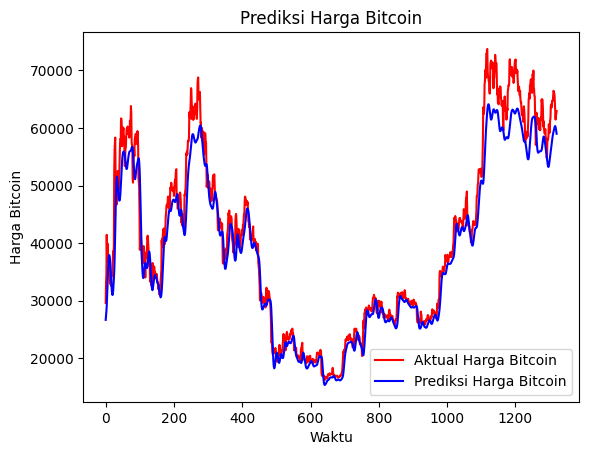

In [41]:
# Mempersiapkan x_test dan prediksi harga

x_test=[]
for i in range(60,1382):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_harga = model_lstm.predict(x_test)
pred_harga = sc.inverse_transform(pred_harga)
plot_pred(test_set,pred_harga)

Kode tersebut menghitung Root Mean Squared Error (RMSE) dari model prediksi harga, menggunakan data pengujian test_set dan prediksi pred_harga. RMSE merupakan metrik yang umum digunakan untuk mengevaluasi model regresi, yang mengukur rata-rata kesalahan kuadrat antara nilai aktual dan nilai prediksi. Semakin kecil nilai RMSE, semakin baik kinerja model.

In [47]:
# Evaluasi model

RSM_LSTM = return_rmse(test_set,pred_harga)

Kode tersebut mendefinisikan x_test dan melakukan prediksi harga menggunakan model lstm_gru. Berikut penjelasannya:

x_test:

Kode ini mengambil data dari inputs mulai dari indeks 60 hingga 1382, dengan interval 60. Ini berarti kode ini mengambil data yang belum pernah dilihat oleh model sebelumnya.
x_test kemudian diubah menjadi array NumPy dan dibentuk ulang menjadi tiga dimensi, sesuai dengan kebutuhan model LSTM-GRU.
pred_harga_gru:

Kode ini melakukan prediksi harga menggunakan model lstm_gru pada data x_test.
Hasil prediksi kemudian diubah kembali ke skala asli menggunakan sc.inverse_transform(), yang merupakan fungsi dari MinMaxScaler yang sebelumnya digunakan untuk menskalakan data.
plot_pred(test_set,pred_harga_gru):

Ini kemungkinan merupakan fungsi yang akan memplot hasil prediksi dengan data asli yang digunakan untuk pengujian (test_set).

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step


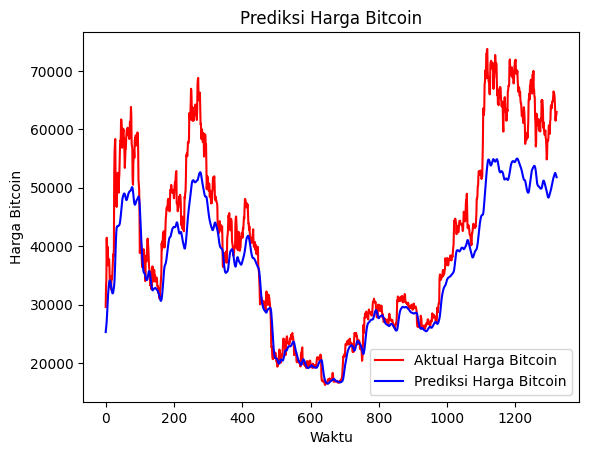

In [49]:
# x_test dan prediksi harga

x_test = []
for i in range(60,1382):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_harga_gru = model_gru.predict(x_test)
pred_harga_gru = sc.inverse_transform(pred_harga_gru)
plot_pred(test_set,pred_harga_gru)

Kode tersebut menghitung Root Mean Squared Error (RMSE) dari model prediksi harga, menggunakan data pengujian test_set dan prediksi pred_harga. RMSE merupakan metrik yang umum digunakan untuk mengevaluasi model regresi, yang mengukur rata-rata kesalahan kuadrat antara nilai aktual dan nilai prediksi. Semakin kecil nilai RMSE, semakin baik kinerja model.

In [51]:
# Evaluasi model GRU

RMS_GRU = return_rmse(test_set,pred_harga_gru)

Kode tersebut menghitung nilai root mean squared error (RMSE) untuk dua model prediksi harga, yaitu model LSTM dan model GRU. Kemudian, nilai RMSE tersebut disimpan dalam variabel rmse_values dan nama model disimpan dalam variabel model_names.

Untuk lebih jelasnya, berikut penjelasan lebih detail:

return_rmse(test_set, pred_harga): Fungsi ini menghitung RMSE dari model dengan menggunakan data uji (test_set) dan prediksi harga yang dihasilkan model (pred_harga).

rmse_values = [return_rmse(test_set, pred_harga), return_rmse(test_set, pred_harga_gru)]: Baris kode ini menghitung RMSE untuk kedua model dan menyimpan nilainya dalam variabel rmse_values.

model_names = ['Model LSTM', 'Model GRU']: Baris kode ini menyimpan nama model dalam variabel model_names.

In [52]:
rmse_values = [return_rmse(test_set, pred_harga), return_rmse(test_set, pred_harga_gru)]
model_names = ['Model LSTM', 'Model GRU']

Kode yang tersebut berikan adalah untuk membandingkan kinerja dua model machine learning (LSTM dan GRU) dalam memprediksi data time series. Berikut penjelasan singkatnya:

model_names dan rmse_values: Ini adalah daftar yang berisi nama model dan nilai Root Mean Squared Error (RMSE) untuk setiap model. RMSE adalah metrik umum untuk mengukur kesalahan prediksi dalam regresi.

plt.figure(figsize=(4, 4)): Ini mengatur ukuran chart batang.

plt.bar(model_names, rmse_values, color=['blue', 'orange']): Ini membuat chart batang dengan:
model_names sebagai label sumbu x.

rmse_values sebagai nilai batang.

color=['blue', 'orange'] untuk memberi warna berbeda pada batang.
plt.ylabel('RMSE'): Memberi label sumbu y dengan "RMSE".

plt.title('Perbandingan RMSE antara Model'): Memberikan judul chart.

plt.show(): Menampilkan chart batang yang dibuat.

print(f'RSM_LSTM = {RSM_LSTM}') dan print(f'RMS_GRU = {RMS_GRU}'): Menampilkan nilai RMSE untuk setiap model secara terpisah.

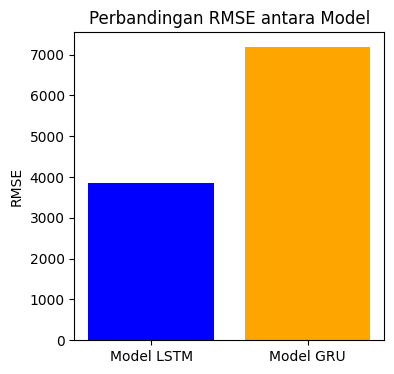

RSM_LSTM = 3856.774009475662
RMS_GRU = 7187.284580189369


In [53]:
# Buat chart batang
plt.figure(figsize=(4, 4))  # Sesuaikan ukuran chart (lebar, tinggi)
plt.bar(model_names, rmse_values, color=['blue', 'orange'])
plt.ylabel('RMSE')
plt.title('Perbandingan RMSE antara Model')

# Tampilkan chart
plt.show()

print(f'RSM_LSTM = {RSM_LSTM}')
print(f'RMS_GRU = {RMS_GRU}')